In [6]:
import numpy as np
import numpy.random as rd
import numpy.linalg as lg
import matplotlib.pyplot as plt
import scipy.spatial.distance as spd
import pickle
from scipy.linalg import sqrtm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,cross_val_predict,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import scipy.spatial.distance as spd
from sklearn.metrics import mean_absolute_error

fName = 'MNISTsmall.p'
D = pickle.load(open(fName,'rb'))
print(D.keys())
foldTrain = D['foldTrain']
trueClass=D['trueClass']
foldTest = D['foldTest']
X = D['X']
X=X[:,(trueClass==0) & foldTest]
X=X[:,0:321]
X = X*1.
print(X.shape)

dict_keys(['foldTrain', 'trueClass', 'foldTest', 'X'])
(784, 321)


In [11]:
#Pergunta a) F F V F
cov=np.cov(X)
print(cov.shape)
det = np.linalg.det(cov)
print(det)
u,v=lg.eig(cov)

(784, 784)
0.0


In [12]:
#Pergunta b) F V F F
Cx=np.cov(X)
u,W=lg.eig(Cx)
u=u.real
W=W.real
idx=np.argsort(-u)
u=u[idx]
W=W[:,idx]
#plt.plot(np.log(u+1e-10))
x1=X[:,282]
x2=Xr[:,282]
mae = mean_absolute_error(x1,x2)
print(mae)

NameError: name 'Xr' is not defined

In [13]:
#Pergunta c) F V F F
d=np.around(X)
m=np.mean(X)
normaMedia = lg.norm(m)
print("Norma: ", normaMedia)
print("Desvio Padrao",np.std(d[152,:]))

Norma:  39.334716129442434
Desvio Padrao 107.15906633691685


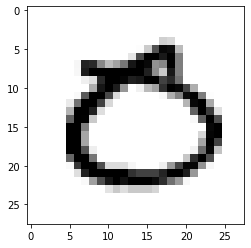

In [14]:
#Pergunta d) V F F F
a=np.reshape(X[:,238],(28,28))
plt.imshow(a,cmap="binary",interpolation=None)

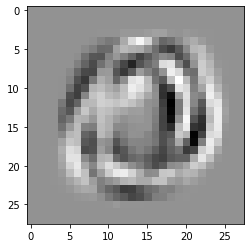

In [15]:
v=np.real(v)
b=np.reshape(v[:,16],(28,28))
plt.imshow(b,cmap='gray',interpolation=None)
#plt.grid()

In [16]:
#Pergunta e) F F F V
Cx=np.cov(X)


u,W=lg.eig(Cx)
u=u.real
W=W.real

idx=np.argsort(-u)
u=u[idx]
W=W[:,idx]
Woriginal=W
#plt.plot(np.log(u+1e-10))

W2=W[:,:43]
Xp=np.dot(W2.T,X)
Xr=np.dot(W2,Xp)

x1=X[:,261]
x2=Xr[:,261]

mse = np.mean((x1 - x2)**2)
print(mse)
print("Erro_quadratico_medio:", np.round(mse,0))

561.3780275287503
Erro_quadratico_medio: 561.0


In [17]:
#Pergunta f) V F F F
Cx=np.cov(X)
(v,W)=np.linalg.eig(Cx)
v = v.real
idx = np.argsort(-v)
v = v / np.sum(v)
v = v[idx]

l = np.cumsum(v)
k = np.sum(l <= 0.60) + 1
print("O numero mínimo de componentes principias ->", k)

O numero mínimo de componentes principias -> 9


In [18]:
#Pergunta g) F V F F
print("Nº de píxeis a 0 ->", np.sum((np.sum(X, axis=1)) == 0))

Nº de píxeis a 0 -> 322


In [19]:
#Pergunta h) F V F F
f=np.round(X,decimals=2)
C1=np.cov(X)
idx1=np.diag(C1)==0
print(np.sum(idx1))
coef=np.corrcoef(X[244,:],X[634,:])
print("coeficiente_correlacao 245 a 635:", np.round(coef[1, 0], 2))

322
coeficiente_correlacao 245 a 635: -0.02


In [20]:
#Pergunta i) F F V F
produto_interno = np.dot(X[:,44],X[:,148])
print("O produto interno entre os vetores x1 e x2 ->", np.round(produto_interno, 0))

produto_interno2 = np.dot(X[:,266] ,X[:,277])
print("O produto interno entre os vetores x3 e x4 ->", np.round(produto_interno2, 0))

O produto interno entre os vetores x1 e x2 -> 5311517.0
O produto interno entre os vetores x3 e x4 -> 5567856.0


In [21]:
#Pergunta j) F F F V
C0=np.cov(X)
u,v = lg.eig(C0)
print(np.sum(u>pow(10,-10)))

320
